<a href="https://colab.research.google.com/github/Alishapunw/Data-Science-Bootcamp/blob/Master---Homework-Assignments/Predictive_Analysis_on_House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

#importing Housing data set
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
#checking for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

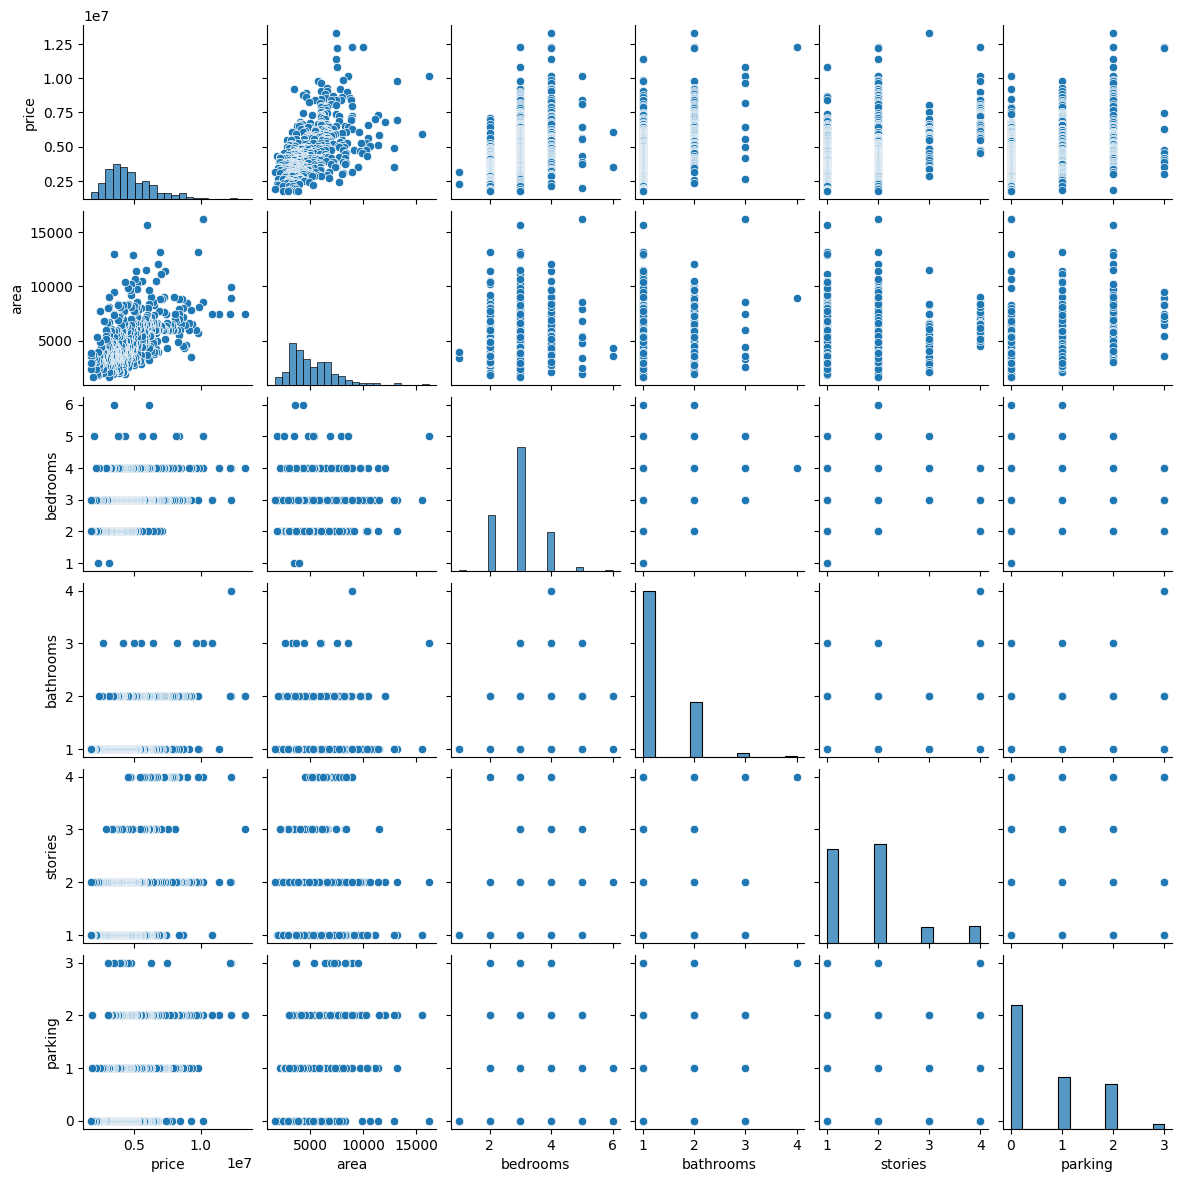

In [66]:
#Checking for pair plots
sns.pairplot(data = df, height = 2)

<ipython-input-22-608a5584c4a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-22-608a5584c4a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True)


<Axes: >

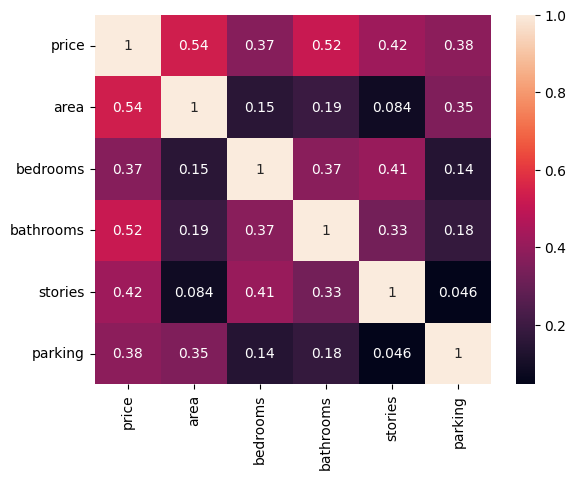

In [22]:
#looking for correlation in the data
df.corr()
sn.heatmap(df.corr(), annot=True)

<ipython-input-24-1020f0d48e68>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = pd.DataFrame.cov(df)


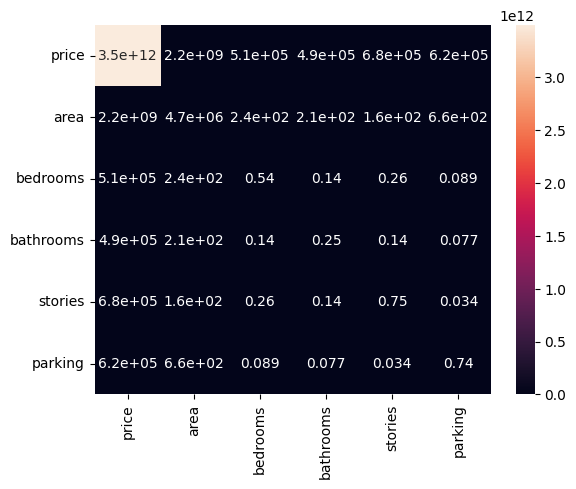

In [24]:
# Creating a Covariance Matrix
cov_matrix = pd.DataFrame.cov(df)
sn.heatmap(cov_matrix, annot=True)
plt.show()

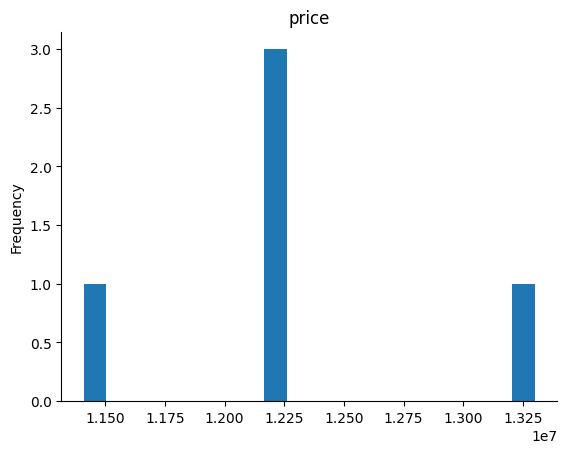

In [17]:
from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

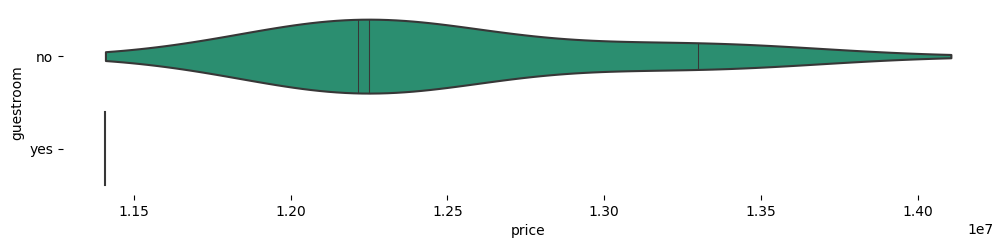

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['guestroom'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='price', y='guestroom', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [42]:
#Adjusting Binary variables
data_train = df.copy()
binary_cols = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['no'], value=0)


data_train.head()
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c in ['furnishingstatus']]
cat_data = data_train[cat_cols]
cat_cols

final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(545, 14)

In [58]:
#Applying linear regression since there is only one output varible y = price
y = final_data['price']
X = final_data.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (381, 13)
Validation Set Dimensions: (164, 13)
Training Set Dimensions: (381,)
Validation Set Dimensions: (164,)


In [57]:
#normalising data
num_cols = ['area', 'parking']
num_cols
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
108,-0.857789,4,1,3,1,0,0,0,0,0.380011,0,1,0
250,-0.738788,3,1,3,1,0,0,0,0,-0.778263,0,1,0
217,0.738591,3,1,2,1,0,0,0,1,1.538285,1,0,0
129,2.765140,3,1,3,1,0,0,0,0,1.538285,1,1,0
540,-0.963568,2,1,1,1,0,1,0,0,1.538285,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.050147,3,1,1,0,0,0,0,1,-0.778263,1,0,1
215,-0.452303,3,1,3,1,0,0,0,0,-0.778263,0,0,1
349,-0.161411,3,1,2,1,0,0,0,0,-0.778263,0,1,0
309,-0.244271,4,1,2,1,0,0,0,1,-0.778263,0,1,0


In [45]:
#Applying Linear Regression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [46]:
reg.coef_

array([ 530950.83458069,  145861.53655755, 1092500.34892338,
        451378.05884749,  489266.74756067,  377853.94646474,
        311312.44323659,  699735.17187595,  827821.40236756,
        251104.32062411,  707663.4056436 , -214139.49456056,
       -480326.98496372])

In [47]:
reg.intercept_

1297183.0161756775

In [48]:
mean_absolute_error(y_train,reg.predict(X_train))

796369.5332661357

In [49]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1079911.6788048318